# Importing all the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
import streamlit as st

# Import the dataset

In [3]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
data_size = df.size

14595

In [43]:
data = df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


# Exploratory Data Analysis (EDA)

### Understand the distribution, relationship and trends

In [48]:
 data_numeric = df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [47]:
 data_categorical = df.describe(include="object")

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


In [12]:
data = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [85]:
for col in df.columns:
    print(col, len(df[col].unique()) , df[col].unique())

Age 42 [56 46 32 25 38 36 40 28 41 53 57 20 39 19 47 55 50 29 42 44 59 45 33 54
 24 26 35 21 31 43 37 52 34 23 51 27 48 58 18 22 30 49]
Gender 2 ['Male' 'Female']
Weight (kg) 532 [ 88.3  74.9  68.1  53.2  46.1  58.   70.3  69.7 121.7 101.8 120.8  51.7
 112.5  94.5 117.7  42.5  64.   43.8  66.8  75.2  89.   71.9  71.  120.9
  64.3  63.7  65.2  53.9  84.9  78.  108.2  65.4  50.2  58.9  81.4 127.6
  59.3  96.9  62.6  45.5  48.8  44.3 113.2  60.5 124.2  52.4  54.7  88.1
  59.7  79.7  51.   84.2 122.1  96.7  73.  114.8  65.5  50.3  61.   44.6
  58.2  44.8  87.5  51.8  64.4  67.1  85.9  61.1 106.5  61.4  40.5  70.1
  94.1  55.5  53.7  66.1 103.9  61.7  52.3  59.5  72.9  76.7  72.1  54.8
 105.   55.   81.6  75.6  81.5  61.5  74.   56.4 102.6  54.6 129.  103.5
  59.4  60.1  77.7  41.2  58.6 109.3  69.6  56.2  71.7  86.   79.4  78.4
  55.4  85.5  87.6  82.4  67.   42.3  82.7  92.4  63.2  86.6 129.5  98.
  86.2  78.6  59.   57.3 122.3  85.3  45.2  55.6  82.8 125.2  58.5  86.1
  63.5  69.3  70.5 

In [36]:
data = df.dtypes

### Visualize the dataset using charts and plots

- unvarient analysis for numerical analysis

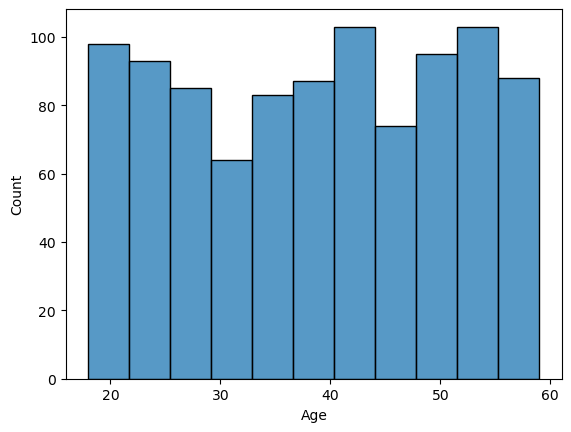

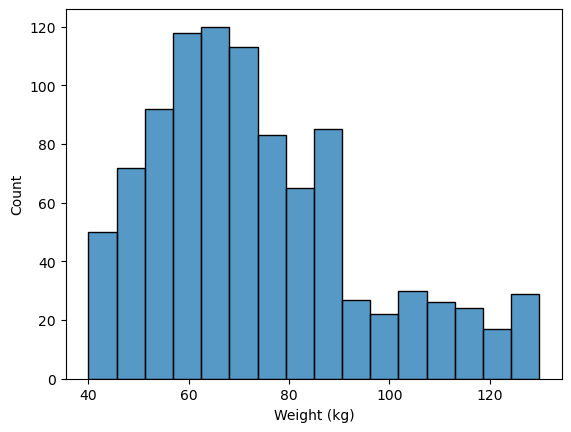

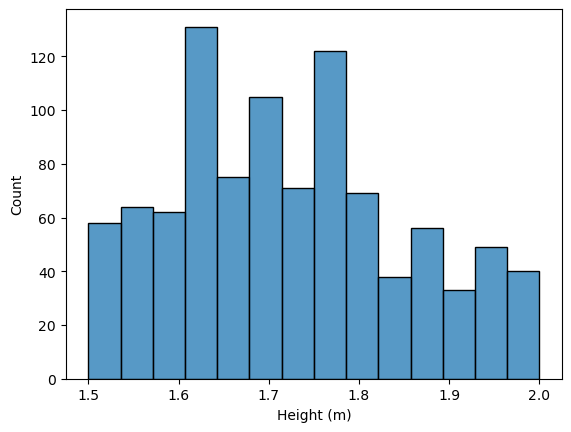

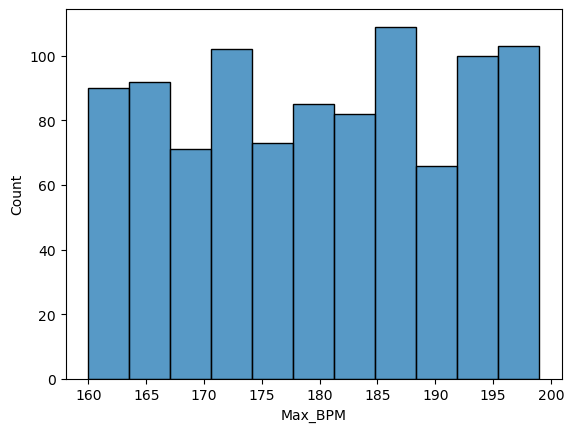

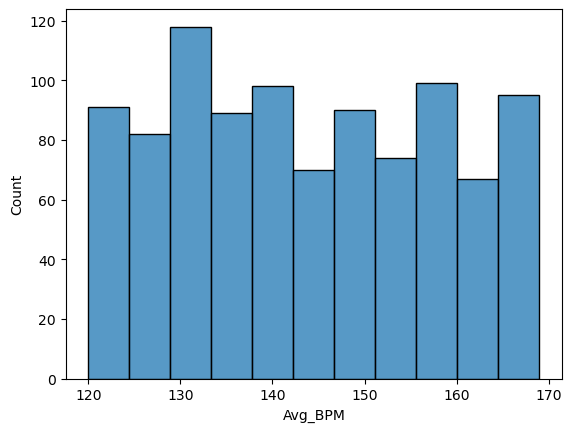

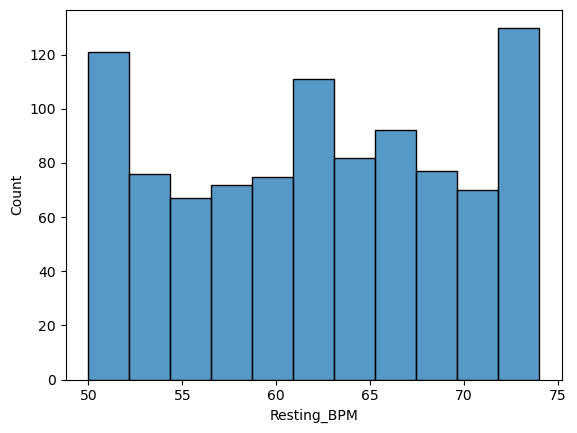

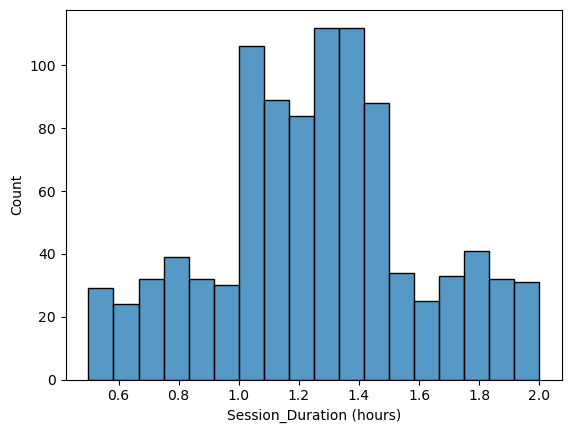

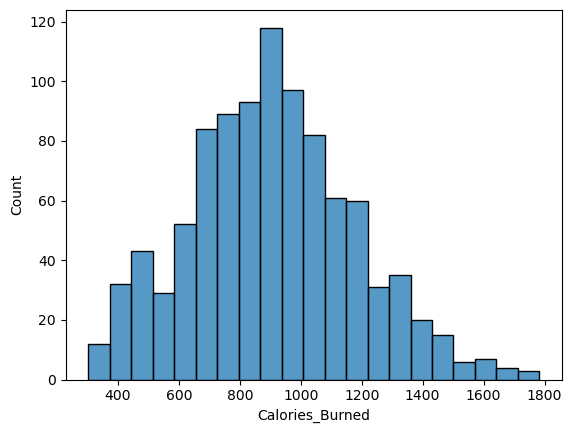

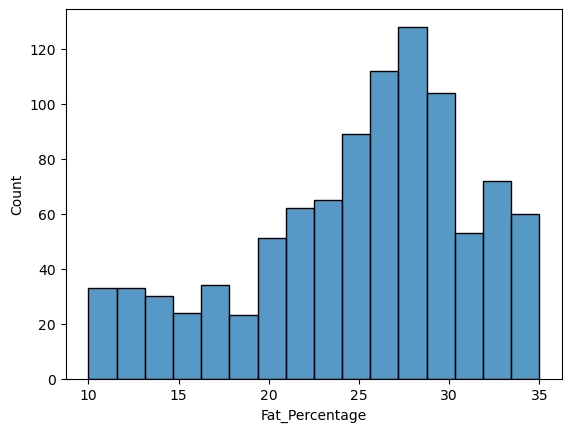

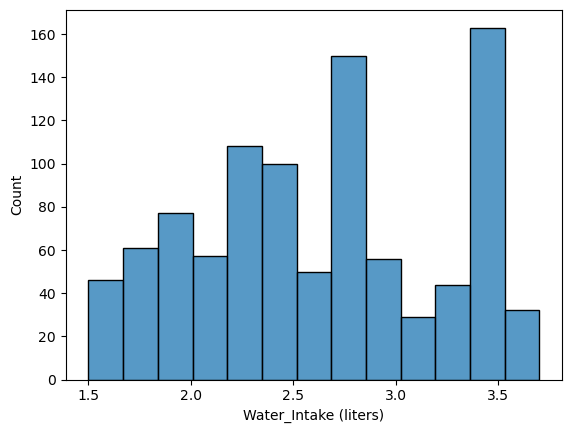

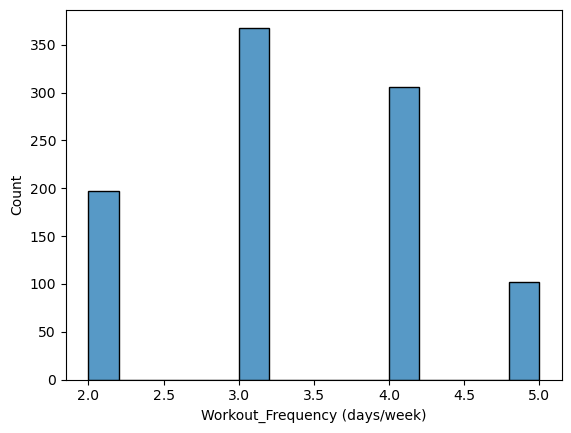

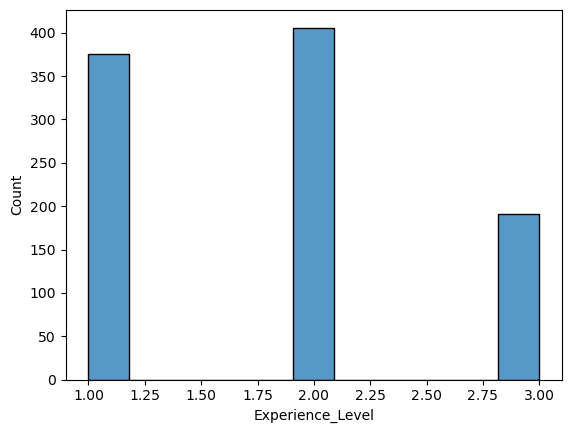

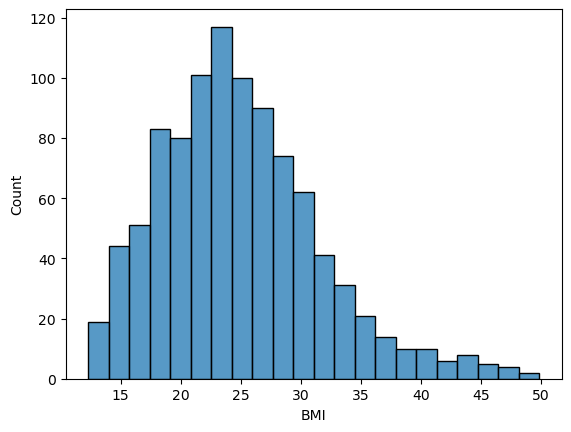

In [91]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

- unvarient analysis for categorical analysis

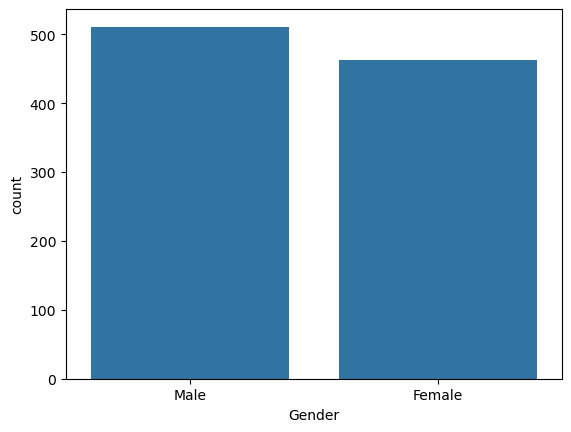

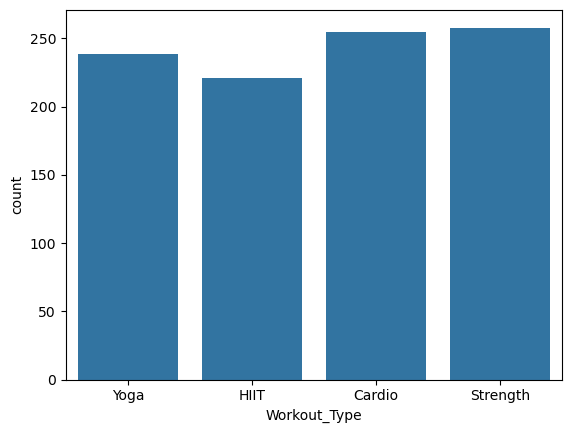

In [89]:
for i in df.select_dtypes(include="object").columns:
    sns.countplot(data=df,x=i)
    plt.show()

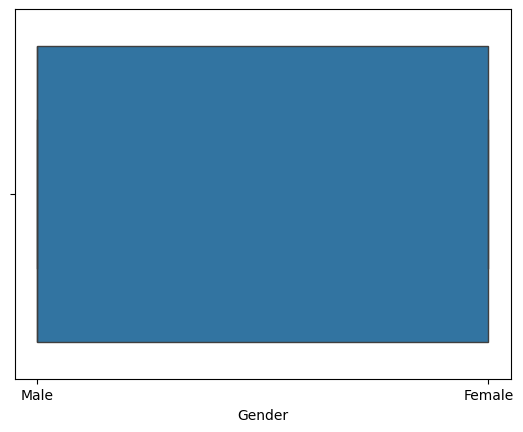

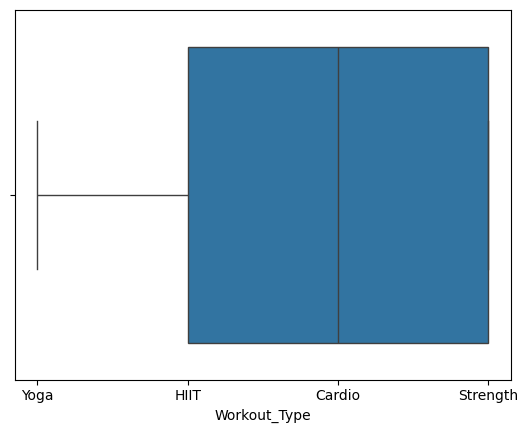

In [94]:
for i in df.select_dtypes(include="object").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

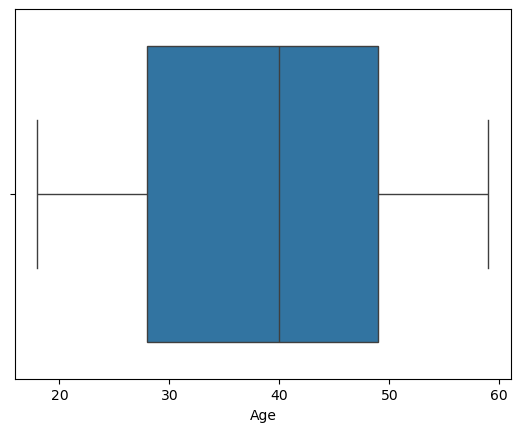

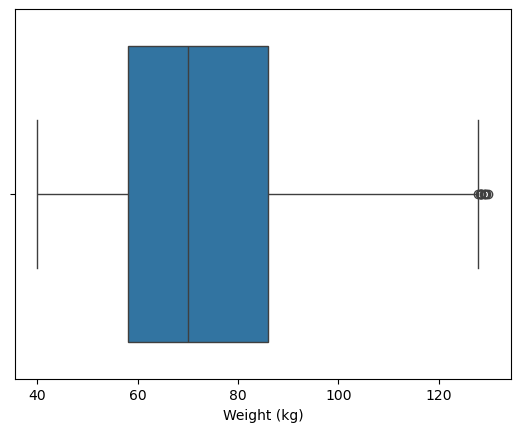

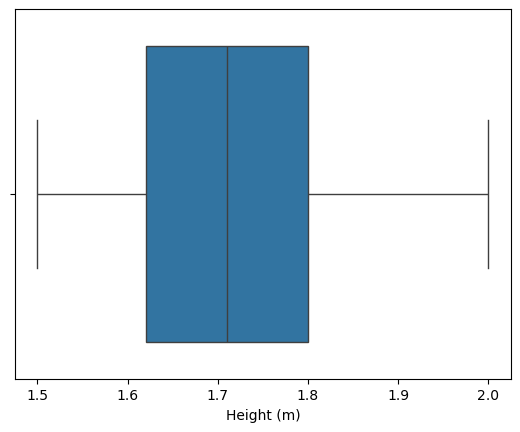

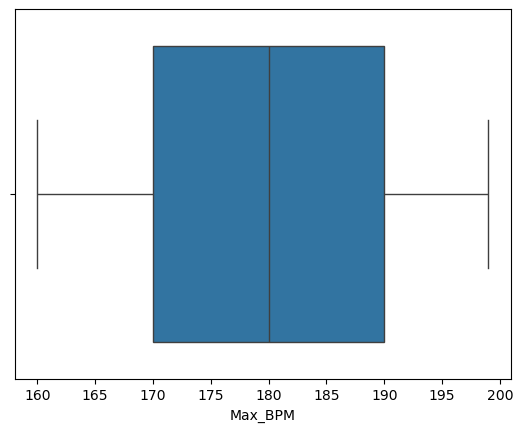

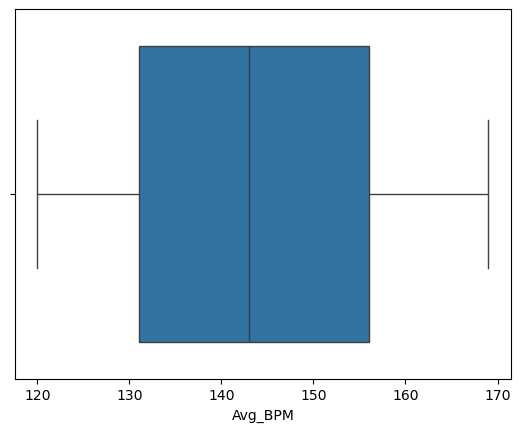

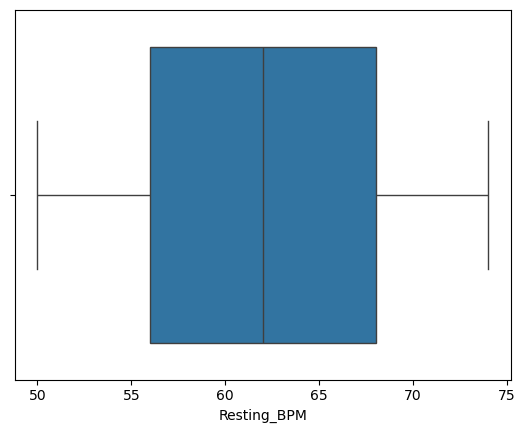

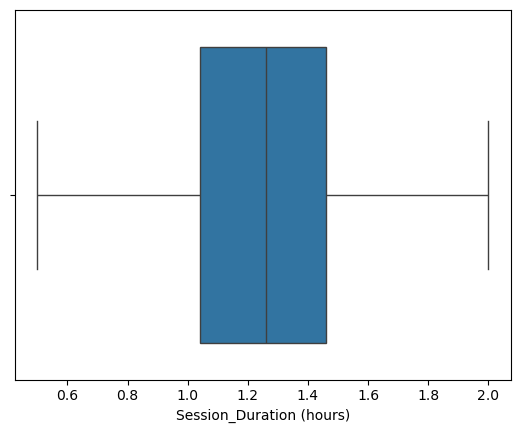

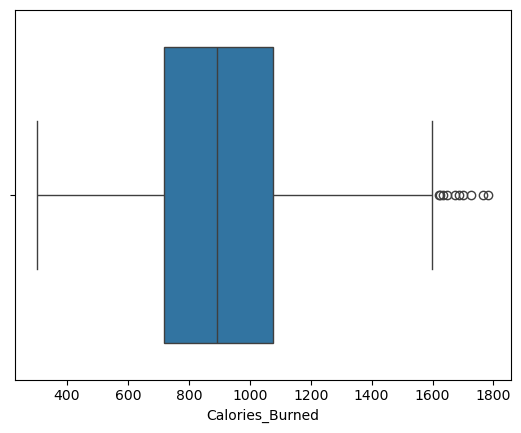

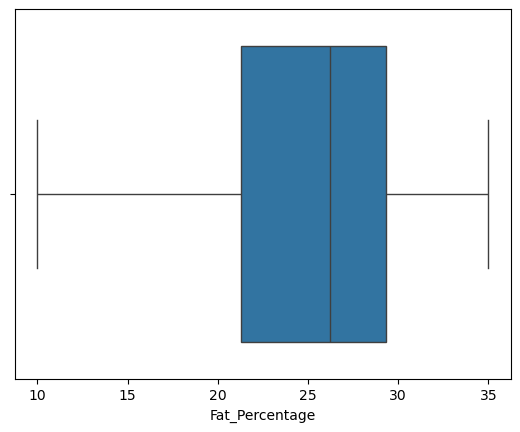

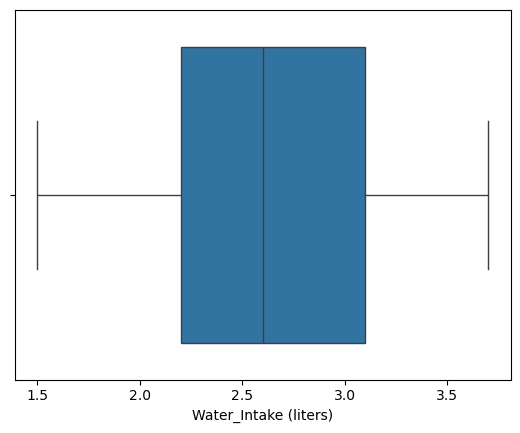

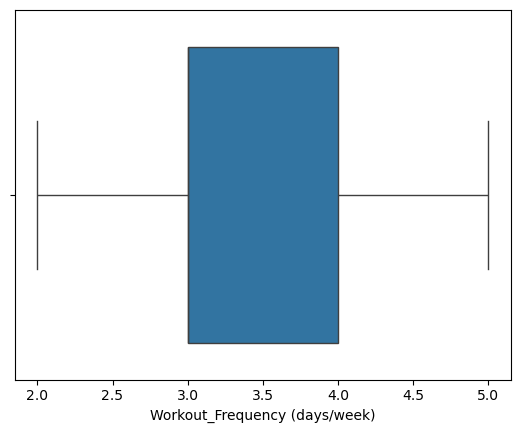

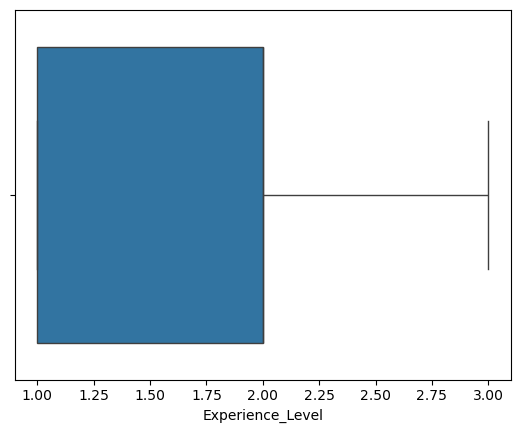

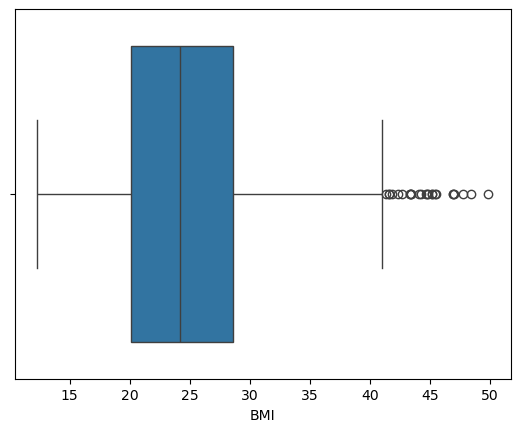

In [95]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

- bivariant for numerical vs numerical (correlation matrix heatmap or scatter plot)

In [96]:
data = df.select_dtypes(include="number").columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'],
      dtype='object')

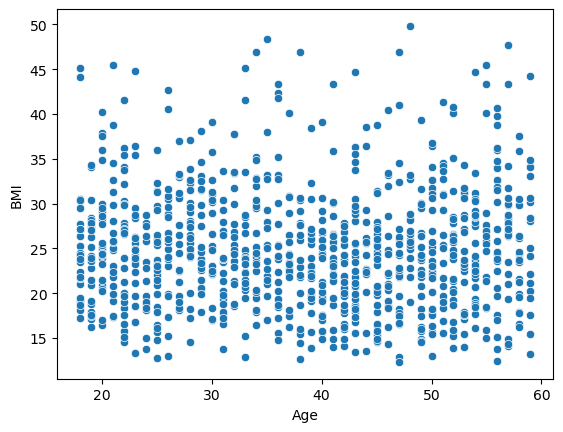

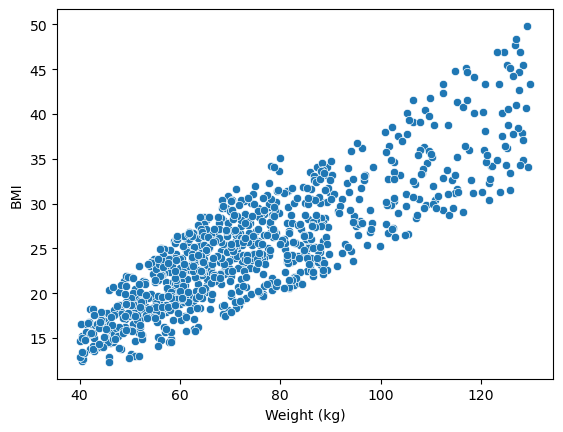

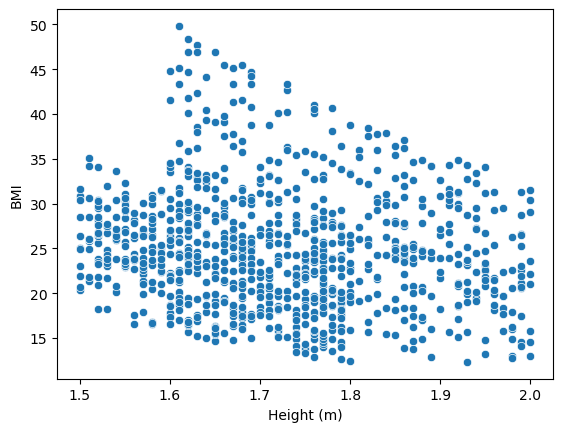

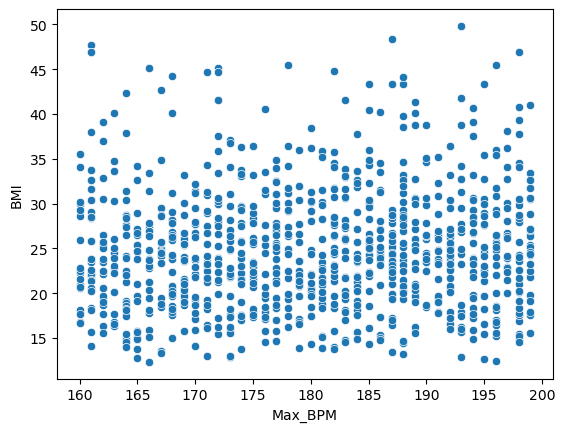

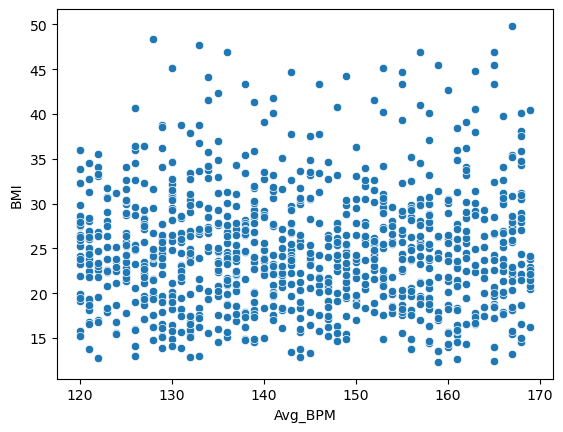

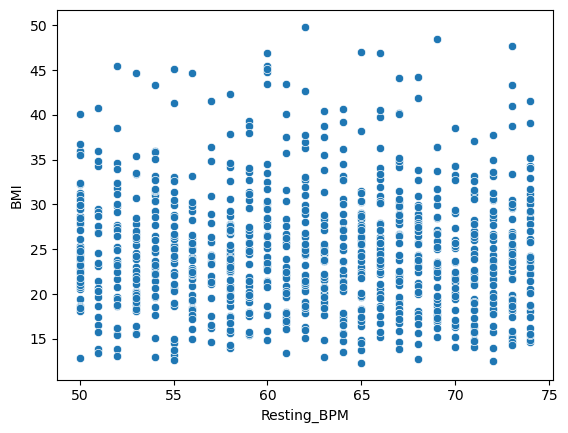

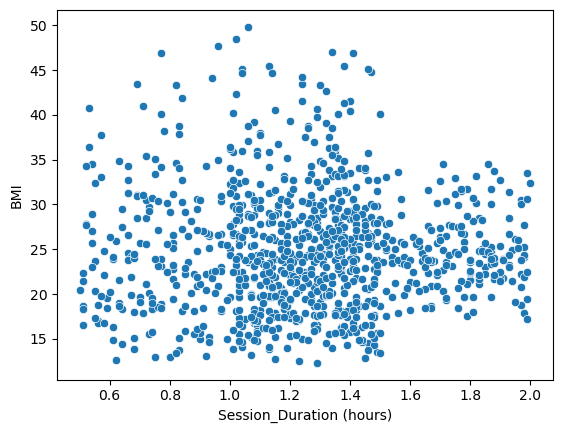

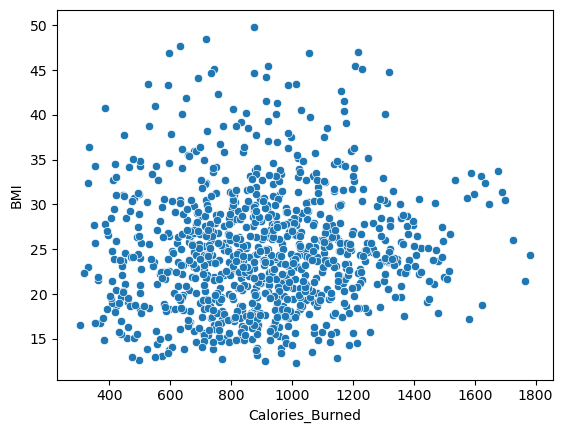

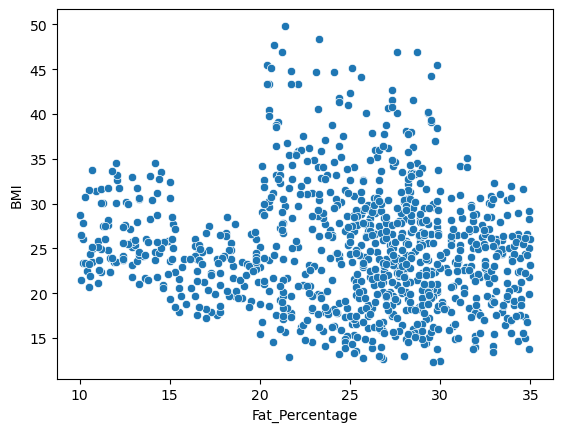

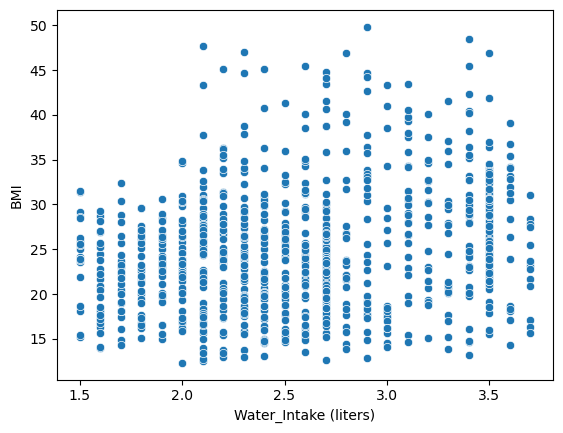

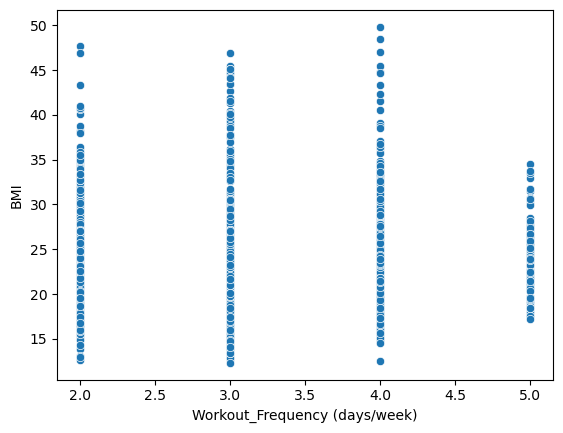

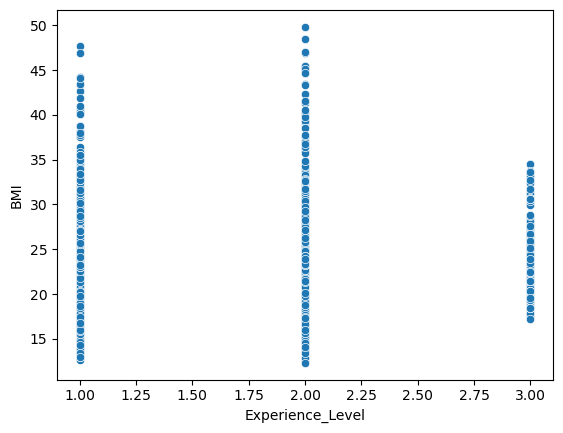

In [97]:
for i in ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level']:
    sns.scatterplot(data=df,x=i,y='BMI')
    plt.show()

In [5]:
df_corr = df.select_dtypes(include="number").corr()

<Axes: >

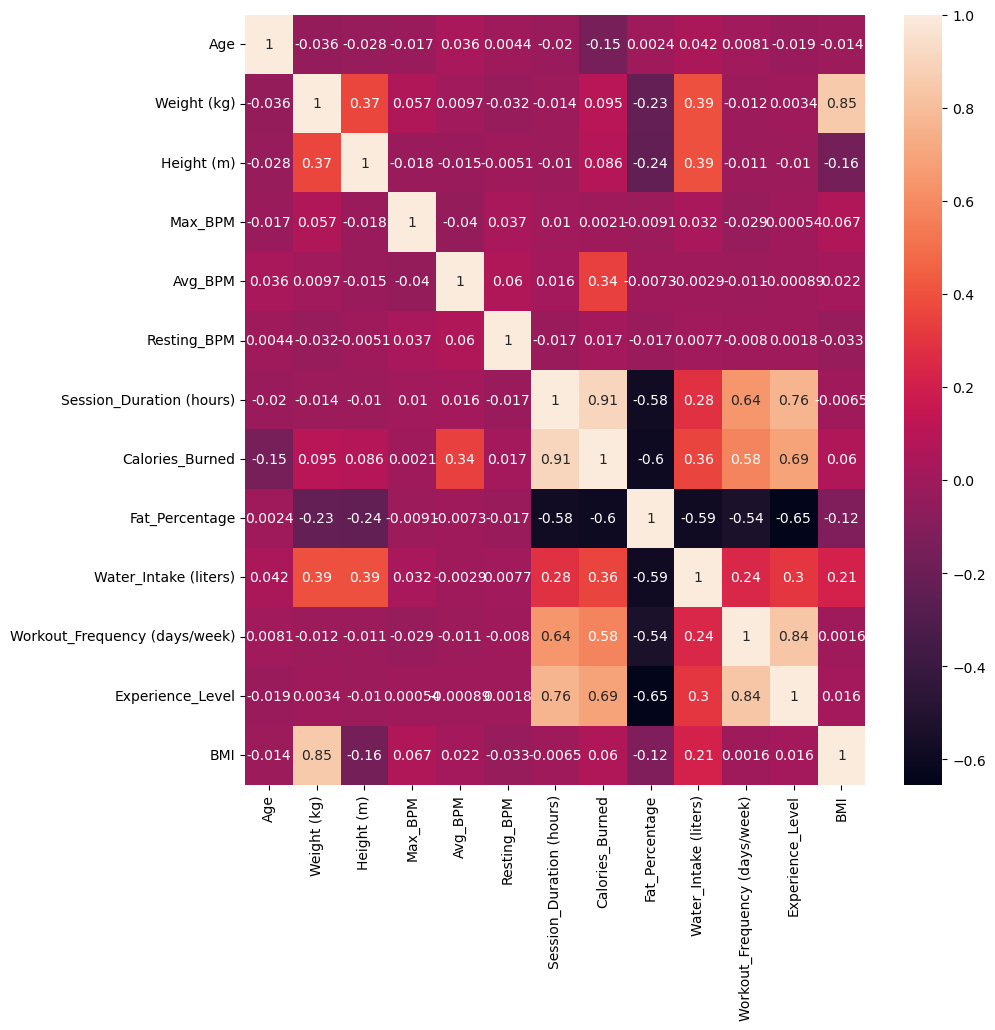

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True)

# Data Cleaning

In [107]:
data_shape = df.shape

(973, 15)

In [108]:
data = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

- handle missing values

In [110]:
data = df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [111]:
data = df.isnull().sum()/df.shape[0]*100

Age                              0.0
Gender                           0.0
Weight (kg)                      0.0
Height (m)                       0.0
Max_BPM                          0.0
Avg_BPM                          0.0
Resting_BPM                      0.0
Session_Duration (hours)         0.0
Calories_Burned                  0.0
Workout_Type                     0.0
Fat_Percentage                   0.0
Water_Intake (liters)            0.0
Workout_Frequency (days/week)    0.0
Experience_Level                 0.0
BMI                              0.0
dtype: float64

- handle duplicates

In [113]:
data = df.duplicated().sum()

0

- Find garbage values

In [114]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Gender
Male      511
Female    462
Name: count, dtype: int64
******************************
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64
******************************


- address outliers and dependecies

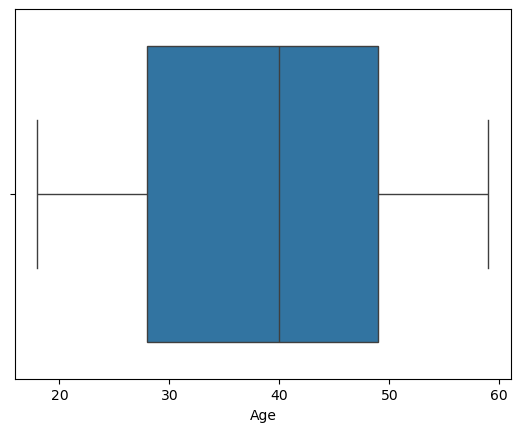

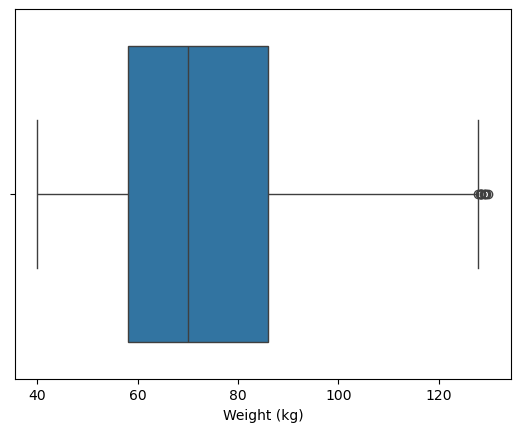

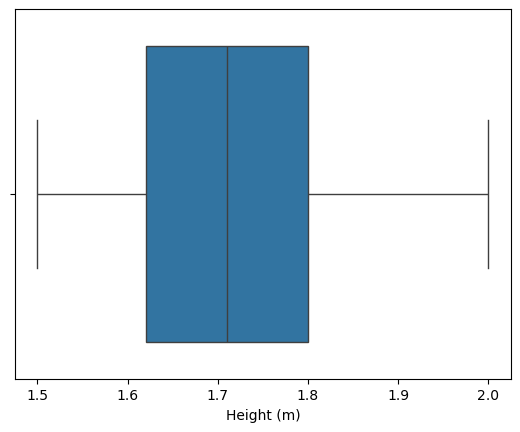

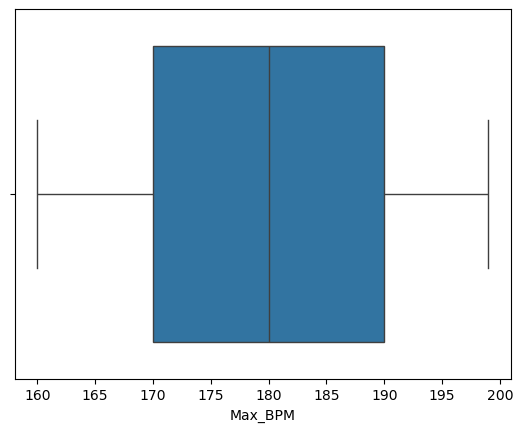

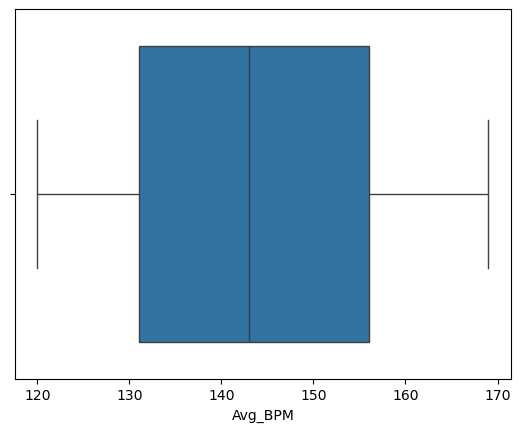

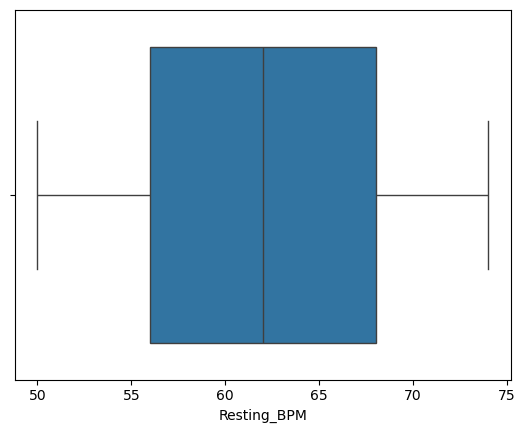

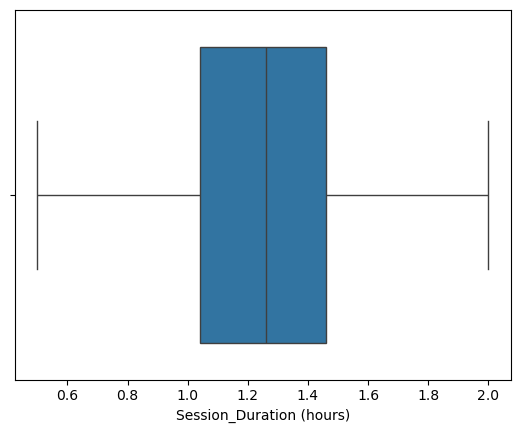

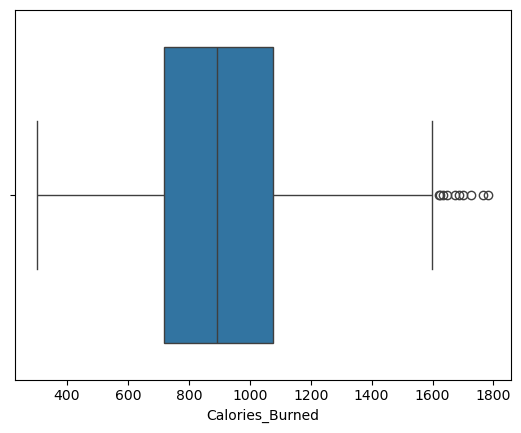

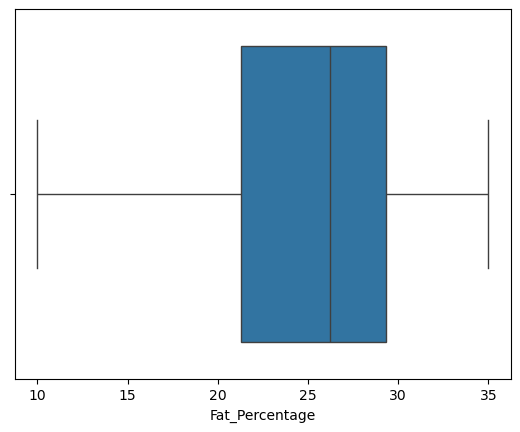

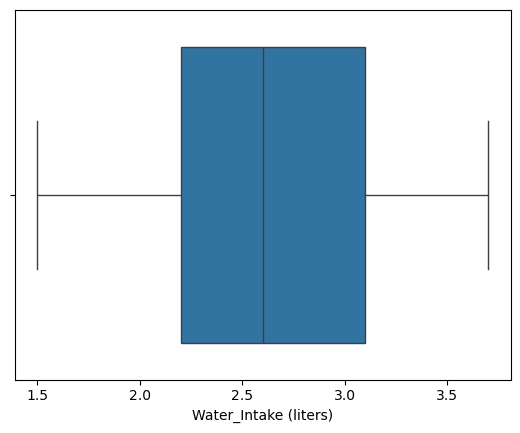

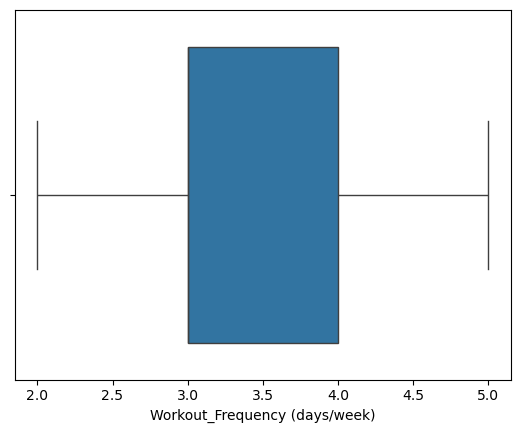

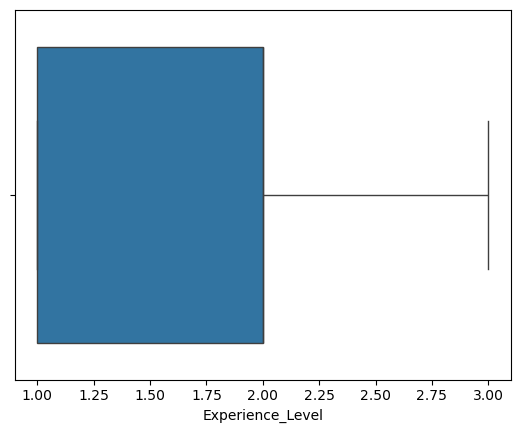

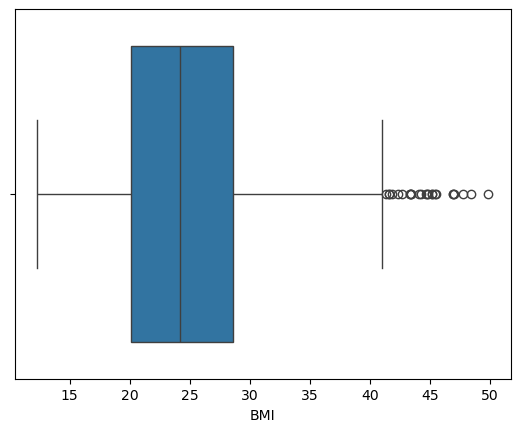

In [115]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [6]:
q1 = df['Calories_Burned'].quantile(0.25)
q3 = df['Calories_Burned'].quantile(0.75)
iqr = q3-q1

In [7]:
showing = q1,q3,iqr

(720.0, 1076.0, 356.0)

In [8]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5 * iqr)
limits = lower_limit, upper_limit

(186.0, 1610.0)

<Axes: ylabel='Calories_Burned'>

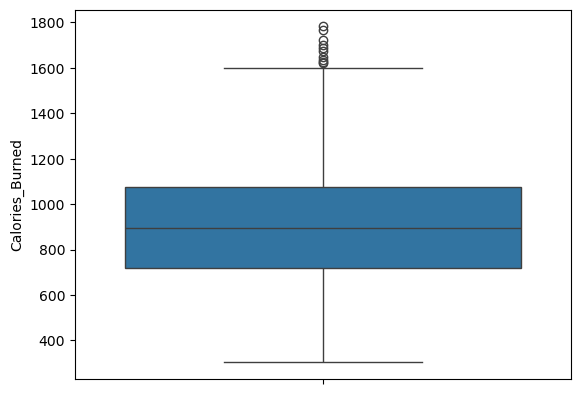

In [9]:
sns.boxplot(df['Calories_Burned'])

In [10]:
outlier_values = df.loc[(df['Calories_Burned'] > upper_limit) | (df['Calories_Burned'] < lower_limit)]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
90,25,Male,81.5,1.61,170,159,63,1.93,1688.0,HIIT,10.9,3.5,4,3,31.44
99,24,Female,60.1,1.79,170,165,63,1.97,1625.0,Cardio,15.9,2.7,4,3,18.76
124,26,Male,86.2,1.68,189,157,72,1.97,1701.0,Strength,13.3,3.5,5,3,30.54
475,27,Male,89.3,1.64,192,162,64,1.82,1622.0,HIIT,12.1,3.5,4,3,33.20
511,39,Male,86.2,1.82,191,160,72,1.96,1725.0,Strength,10.2,3.5,5,3,26.02
572,36,Male,88.0,1.71,185,160,73,1.87,1646.0,HIIT,12.0,3.5,5,3,30.09
646,22,Male,88.5,1.62,174,162,69,1.88,1675.0,Strength,10.7,3.5,5,3,33.72
712,19,Male,82.4,1.96,174,169,62,1.90,1766.0,HIIT,10.1,3.5,5,3,21.45
728,47,Male,87.2,1.64,177,165,50,2.00,1634.0,Strength,15.0,3.5,4,3,32.42
910,32,Male,89.8,1.92,199,168,67,1.93,1783.0,Strength,10.6,3.5,4,3,24.36


In [11]:
new_df = df.loc[(df['Calories_Burned'] < upper_limit) & (df['Calories_Burned'] > lower_limit)]
print('Before removing outliers:', len(df))
print('After removing outliers:', len(new_df))
print('outliers:', len(df)-len(new_df))

Before removing outliers: 973
After removing outliers: 963
outliers: 10


<Axes: ylabel='Calories_Burned'>

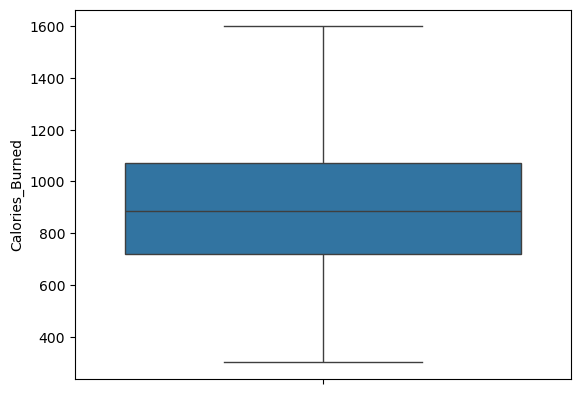

In [12]:
sns.boxplot(new_df['Calories_Burned'])

In [13]:
new_df = df.copy()
new_df.loc[(new_df['Calories_Burned']>upper_limit), 'Calories_Burned'] = upper_limit
new_df.loc[(new_df['Calories_Burned']<lower_limit), 'Calories_Burned'] = lower_limit

<Axes: ylabel='Calories_Burned'>

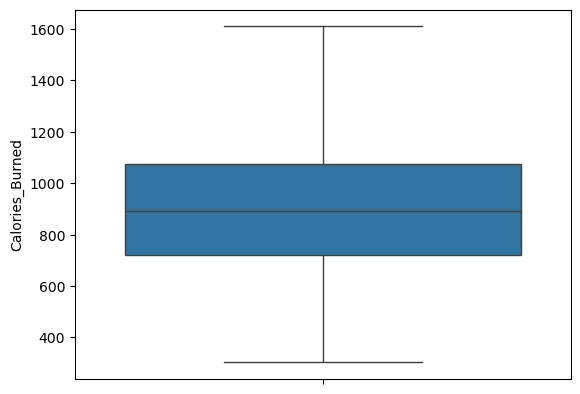

In [14]:
sns.boxplot(new_df['Calories_Burned'])

In [18]:
df=new_df

# Feature Engineering

- Encode categorical variable

In [28]:
categorical_cols = df.select_dtypes(include="object").columns

Index(['Gender', 'Workout_Type'], dtype='object')

In [29]:
encoded_df = pd.get_dummies(df, columns=['Gender'], drop_first=False)

In [30]:
new_encoded_df = pd.get_dummies(encoded_df, columns=['Workout_Type'], drop_first=False)
encoded_data = new_encoded_df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,False,True,False,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,True,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,False,True,False


- Scale or normalize numerical features

In [31]:
data = new_encoded_df

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,False,True,False,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,True,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,False,True,False,False,True,False
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,False,True,False,False,True,False
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,True,False,True,False,False,False
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,False,True,False,True,False,False


In [23]:
data = df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Gender_Female', 'Gender_Male',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')

In [33]:
df=new_encoded_df
numericals = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'Gender_Female', 'Gender_Male',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga']
scaler = MinMaxScaler()
df[numericals] = scaler.fit_transform(df[numericals])
joblib.dump(scaler, 'scaler.pkl')

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,0.926829,0.537264,0.42,0.512821,0.755102,0.416667,0.793333,0.772762,0.104,0.909091,0.666667,1.0,30.20,0.0,1.0,0.0,0.0,0.0,1.0
1,0.682927,0.388209,0.06,0.487179,0.632653,0.666667,0.533333,0.443764,0.956,0.272727,0.666667,0.5,32.00,1.0,0.0,0.0,1.0,0.0,0.0
2,0.341463,0.312570,0.32,0.179487,0.040816,0.166667,0.406667,0.286151,0.936,0.363636,0.666667,0.5,24.71,1.0,0.0,1.0,0.0,0.0,0.0
3,0.170732,0.146830,0.40,0.769231,0.897959,0.250000,0.060000,0.175210,0.752,0.272727,0.333333,0.0,18.41,0.0,1.0,0.0,0.0,1.0,0.0
4,0.487805,0.067853,0.58,0.717949,0.775510,0.750000,0.093333,0.193573,0.768,0.590909,0.333333,0.0,14.39,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.146341,0.523915,0.48,0.692308,0.775510,0.708333,0.713333,0.811783,0.000,0.909091,0.666667,1.0,28.77,0.0,1.0,0.0,0.0,1.0,0.0
969,0.170732,0.295884,0.22,0.615385,0.938776,0.250000,0.586667,0.732211,0.600,0.681818,0.000000,0.0,25.69,0.0,1.0,0.0,0.0,1.0,0.0
970,1.000000,0.226919,0.52,0.871795,0.000000,0.125000,0.813333,0.478959,0.352,0.545455,1.000000,1.0,19.50,1.0,0.0,1.0,0.0,0.0,0.0
971,0.341463,0.961068,0.66,0.974359,0.530612,0.500000,0.400000,0.443764,0.728,0.272727,0.333333,0.5,37.74,0.0,1.0,0.0,1.0,0.0,0.0


# Data Splitting

In [34]:
x= df.drop('BMI',axis=1)
y=df['BMI']
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Train size: {X_train.shape[0]}, Validation size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 681, Validation size: 146, Test size: 146


# Model Development and Training

In [23]:
#select a model and initialize
model = LinearRegression()

In [35]:
#train the model on training set
model.fit(X_train,y_train)

LinearRegression()

# Model Evaluation and hyperparameter tunning

In [36]:
#validate the model on validation set
y_val_pred = model.predict(X_val)
#evaluate performance on validation set
val_mae = mean_absolute_error(y_val,y_val_pred)
val_mse = mean_squared_error(y_val,y_val_pred)
var_r2_score = r2_score(y_val,y_val_pred)
print(f"Validation on mean absoulte error: {val_mae:.2f}")
print(f"Validation on mean squared error: {val_mse:.2f}")
print(f"Validation on r2 score: {var_r2_score:.2f}")

Validation on mean absoulte error: 0.64
Validation on mean squared error: 0.75
Validation on r2 score: 0.98


- check for overfitting and underfitting

In [37]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Evaluate on the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Validation Performance:")
print(f"Validation mean absoulte error: {val_mae:.2f}")
print(f"Validation mean squared error: {val_mse:.2f}")
print(f"Validation r2 score: {var_r2_score:.2f}")

print(f"Training Performance:")
print(f"Train mean absoulte error: {train_mae:.2f}")
print(f"Train mean squared error: {train_mse:.2f}")
print(f"Train r2 score: {train_r2:.2f}")

Validation Performance:
Validation mean absoulte error: 0.64
Validation mean squared error: 0.75
Validation r2 score: 0.98
Training Performance:
Train mean absoulte error: 0.58
Train mean squared error: 0.63
Train r2 score: 0.98


# Model testing and deployment

In [38]:
y_test_pred = model.predict(X_test)
# evaluate performance on test set
test_mae = mean_absolute_error(y_test,y_test_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
test_r2 = r2_score(y_test,y_test_pred)

print(f"Testing Performance:")
print(f"Test mean absoulte error: {test_mae:.2f}")
print(f"Test mean squared error: {test_mse:.2f}")
print(f"Test r2 score: {test_r2:.2f}")

Testing Performance:
Test mean absoulte error: 0.59
Test mean squared error: 0.73
Test r2 score: 0.99


In [39]:
joblib.dump(model, 'bmi_predicting_model.pkl')
print("Model saved as 'bmi_predicting_model.pkl'")

Model saved as 'bmi_predicting_model.pkl'


In [22]:
cols = df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Gender_Female', 'Gender_Male',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')

In [42]:
warnings.filterwarnings('ignore',category=FutureWarning)
model = joblib.load('bmi_predicting_model.pkl')


st.title('BMI Prediction App')
st.header('Enter Features for BMI Prediction')

# Create columns
col1, col2, col3 = st.columns(3)

# Column 1 Inputs
with col1:
    age = st.selectbox('Age', options=range(10, 81, 5)) 
    weight = st.selectbox('Weight (Kg)', options=range(30, 151, 5)) 
    height = st.selectbox('Height (cm)', options=range(120, 221, 5)) 
    gender = st.selectbox('Gender', ['Female', 'Male'])

# Column 2 Inputs
with col2:
    Max_BPM = st.selectbox('Maximum BPM', options=range(100, 201, 10))  
    Avg_BPM = st.selectbox('Average BPM', options=range(60, 151, 10))  
    Resting_BPM = st.selectbox('Resting BPM', options=range(40, 101, 10))  
    Workout_Frequency = st.selectbox('Workout Frequency (days/week)', options=range(1, 8))  

# Column 3 Inputs
with col3:
    Session_Duration = st.selectbox('Workout Session Duration (hours)', options=[0.5, 1, 1.5, 2, 2.5, 3])  
    Calories_Burned = st.selectbox('Calories Burned', options=range(100, 1001, 50))  
    Fat_Percentage = st.selectbox('Fat Percentage', options=range(5, 51, 5))  
    Water_Intake = st.selectbox('Water Intake (liters)', options=[0.5, 1, 1.5, 2, 2.5, 3])  
    Experience_Level = st.selectbox('Experience Level', options=range(1, 6))  

# Encode Gender
gender_encoded = {
    'Gender_Female': 0,
    'Gender_Male': 0
}
gender_encoded[f'Gender_{gender}'] = 1

# Workout Type Dropdown
workout_type = st.selectbox('Workout Type', ['Cardio', 'HIIT', 'Strength', 'Yoga'])
workout_encoded = {
    'Workout_Type_Cardio': 0,
    'Workout_Type_HIIT': 0,
    'Workout_Type_Strength': 0,
    'Workout_Type_Yoga': 0
}
workout_encoded[f'Workout_Type_{workout_type}'] = 1

# Predict BMI
if st.button('Predict BMI'):
    input_data = pd.DataFrame({
        'Age': [age],
        'Weight (kg)': [weight],
        'Height (m)': [height / 100],  # Convert height to meters
        'Max_BPM': [Max_BPM],
        'Avg_BPM': [Avg_BPM],
        'Resting_BPM': [Resting_BPM],
        'Session_Duration (hours)': [Session_Duration],
        'Calories_Burned': [Calories_Burned],
        'Fat_Percentage': [Fat_Percentage],
        'Water_Intake (liters)': [Water_Intake],
        'Workout_Frequency (days/week)': [Workout_Frequency],
        'Experience_Level': [Experience_Level],
        **gender_encoded,
        **workout_encoded
    })
    
    # Scale the input data (assuming a preloaded scaler)
    input_data_scaled = scaler.fit_transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data_scaled)
    prediction_value = prediction[0] if isinstance(prediction, (list, np.ndarray)) else prediction
    prediction_value = max(prediction_value, 0)  # Ensure non-negative BMI
    
    st.success(f'Predicted BMI: {prediction_value:.2f}')

2024-12-18 09:02:14.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:02:14.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:02:14.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:02:14.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:02:14.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:02:14.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:02:14.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:02:14.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar